In [127]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [193]:
def read(filename):
    t = []
    data = []
    with open(filename) as f:
        reader = csv.reader(f)
        for r in reader:
            t.append(float(r[0]))
            data.append(float(r[1]))
    return t, data

In [252]:
# fft
def FFT(t,data,filename,filtertype): 
    Fs = len(t)/t[-1]
    print(f"sampling rate {Fs} Hz")
    Ts = 1./Fs
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title(f"{filename}_filter:{filtertype}")
    ax2.loglog(frq,abs(Y),'b') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.show()
    #return [frq, Y]


In [389]:
t1,d1 = read("sigA.csv")
t2,d2 = read("sigB.csv")
t3,d3 = read("sigC.csv")
t4,d4 = read("sigD.csv")
# f1,Y1 = FFT(t1,d1)[0],FFT(t1,d1)[1]
# f2,Y2 = FFT(t2,d2)[0],FFT(t2,d2)[1]
# f3,Y3 = FFT(t3,d3)[0],FFT(t3,d3)[1]
# f4,Y4 = FFT(t4,d4)[0],FFT(t4,d4)[1]

# plt.subplot(2,1,1)
# plt.plot(t1,d1)
# plt.title("A")
# plt.subplot(2,1,2)
# plt.loglog(f1,Y1)

# load data
filename = "sigD.csv"
t,data = read(filename)

In [390]:
# moving average
win = 200
def moving_avg(win, data):
    ndata = []
    for i in range(len(data) - win):
        avg = sum(data[i:(i + win +1)])/win
        ndata.append(avg)
    return ndata
nd = moving_avg(win,data)
nt = t[:(len(t)-win)]

In [391]:
# IIR
decay = .9
def IIR(decay, data):
    idata=[data[0],]
    A = decay
    B = 1 - A
    for i in range(len(data)-1):
        avg = A*idata[i] + B*data[i+1]
        idata.append(avg)
    return idata
iird = IIR(decay,data)

In [392]:
h = [
    -0.000000000000000001,
    0.000064393676763220,
    0.000271319801257540,
    0.000649073204382278,
    0.001235623050647806,
    0.002076637553675906,
    0.003222058252059904,
    0.004721452177155942,
    0.006618513253826244,
    0.008945196904421814,
    0.011716041834802050,
    0.014923251981835048,
    0.018533075973444006,
    0.022483932798082779,
    0.026686597480116862,
    0.031026590809771163,
    0.035368727580917296,
    0.039563585562856544,
    0.043455480385182557,
    0.046891386356592825,
    0.049730143962839937,
    0.051851251307310706,
    0.053162553912562159,
    0.053606224358990776,
    0.053162553912562159,
    0.051851251307310706,
    0.049730143962839930,
    0.046891386356592839,
    0.043455480385182564,
    0.039563585562856544,
    0.035368727580917296,
    0.031026590809771187,
    0.026686597480116866,
    0.022483932798082775,
    0.018533075973443999,
    0.014923251981835051,
    0.011716041834802057,
    0.008945196904421819,
    0.006618513253826253,
    0.004721452177155945,
    0.003222058252059902,
    0.002076637553675908,
    0.001235623050647806,
    0.000649073204382280,
    0.000271319801257541,
    0.000064393676763220,
    -0.000000000000000001,
]

In [393]:
def FIR(h,data):
    win = len(h)
    fird = []
    for i in range(len(data) - win):
        seg = data[i:(i+win)]
        d = np.dot(h,seg)
        fird.append(d)
    return fird
fird = FIR(h,data)
firt = t[:(len(t)-len(h))]

In [394]:
def Plot(ot,od,ft,fd,filename,ftype):
    plt.plot(ot,od,'k')
    plt.plot(ft,fd,'r')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f"{filename}_filter:{ftype}")
    plt.legend(["nonfiltered","flitered"])
    plt.savefig(f"{filename}_filter:{ftype}.png")
    plt.show()

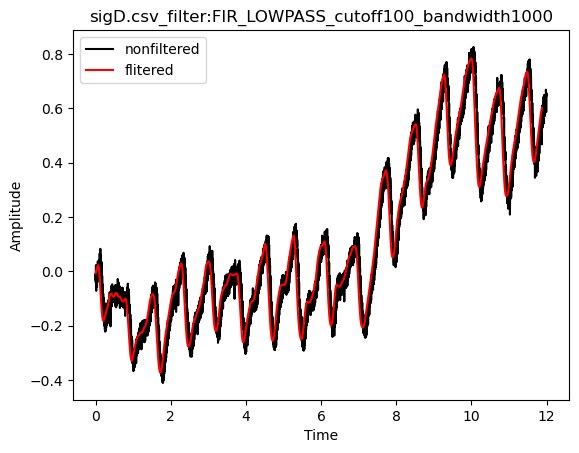

In [395]:
cf = 100
bw = 1000
ftype = f"FIR_LOWPASS_cutoff{cf}_bandwidth{bw}"
Plot(t,data,firt,fird,filename,ftype)